In [1]:
# Клонирование репозитория
!git clone https://github.com/RUGameLink/Project-E.git
%cd Project-E/alt_new_model_gc

Cloning into 'Project-E'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 165 (delta 57), reused 139 (delta 31), pack-reused 0 (from 0)
Receiving objects: 100% (165/165), 16.81 MiB | 20.23 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/Project-E/alt_new_model_gc


In [2]:
# Установка необходимых пакетов
!pip install numpy pandas matplotlib scikit-learn tensorflow seaborn scipy plotly statsmodels

In [3]:
# Импорт функций из модулей
from radon_analysis import *
from radon_models import *
from radon_prediction import *

In [4]:
# Отображение графиков Plotly в ноутбуке
import plotly.io as pio
pio.renderers.default = 'colab'

In [5]:
# Для воспроизводимости результатов
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
# Загрузка собственных данных
from google.colab import files
uploaded = files.upload()  # Загрузите CSV-файл с данными

Saving data.csv to data.csv


In [7]:
# Получение имени загруженного файла
file_name = list(uploaded.keys())[0]

In [8]:
# Загрузка и предобработка данных
data = load_data(file_name)

Загружен файл: data.csv
Форма данных: (8762, 4)
Колонки: ['Datetime', 'Radon (Bq.m3)', 'Temperature (¡C)', 'Pressure (mBar)']

Пропущенные значения до заполнения:
Radon (Bq.m3)        9
Temperature (¡C)    55
Pressure (mBar)      0
dtype: int64
Заполнение пропущенных значений в колонке Radon (Bq.m3) методом интерполяции...
Заполнение пропущенных значений в колонке Temperature (¡C) методом интерполяции...

Пропущенные значения после заполнения:
Radon (Bq.m3)       0
Temperature (¡C)    0
Pressure (mBar)     0
dtype: int64


In [9]:
# Визуализация временных рядов с помощью Plotly
fig_time_series = plot_time_series(data, plot_type='plotly')
fig_time_series.show()

In [10]:
# Анализ корреляций
fig_corr, corr_matrix = analyze_correlations(data, plot_type='plotly')
fig_corr.show()

Корреляция между Radon (Bq.m3) и Temperature (¡C): 0.0789 (p-значение: 0.0000)
Корреляция между Radon (Bq.m3) и Pressure (mBar): -0.0013 (p-значение: 0.9031)
Корреляция между Temperature (¡C) и Pressure (mBar): 0.0301 (p-значение: 0.0048)


In [11]:
# Визуализация взаимосвязей
fig_scatter = plot_scatter_relationships(data, plot_type='plotly')
fig_scatter.show()

In [12]:
# Анализ статистики
stats, fig_hist = analyze_statistics(data, plot_type='plotly')
fig_hist.show()


Базовая статистика:
       Radon (Bq.m3)  Temperature (¡C)  Pressure (mBar)
count    8762.000000       8762.000000      8762.000000
mean    20024.168797          2.713016       985.274763
std      8623.276497          3.243485         8.782672
min       508.000000         -1.354161       958.782100
25%     15255.000000         -0.328124       978.377675
50%     22261.000000          1.951465       984.363240
75%     26329.000000          5.850701       991.461744
max     38533.000000          8.338097      1016.420816


In [13]:
# Сезонная декомпозиция для радона
radon_col = [col for col in data.columns if 'radon' in col.lower()][0]
decomposition, fig_decompose = perform_seasonal_decomposition(data, radon_col, period=24, plot_type='plotly')
fig_decompose.show()

In [14]:
# Анализ запаздывающих переменных
corr_lag, fig_lag = perform_lag_analysis(data, lag_days=7, plot_type='plotly')
fig_lag.show()


Корреляции с радоном (включая запаздывающие переменные):
Radon (Bq.m3)                1.000000
Pressure (mBar)_Lag_24h      0.376100
Pressure (mBar)_Lag_48h      0.367486
Pressure (mBar)_Lag_12h      0.267559
Pressure (mBar)_Lag_168h     0.254735
Pressure (mBar)_Lag_6h       0.160664
Temperature (¡C)_Lag_168h    0.102217
Temperature (¡C)_Lag_48h     0.079067
Temperature (¡C)_Lag_24h     0.073666
Temperature (¡C)_Lag_12h     0.071514
Temperature (¡C)_Lag_6h      0.070858
Temperature (¡C)_Lag_1h      0.068495
Temperature (¡C)             0.067930
Pressure (mBar)_Lag_1h       0.023101
Pressure (mBar)             -0.000929
Name: Radon (Bq.m3), dtype: float64


In [15]:
# Подготовка данных с увеличенной длиной последовательности
X, y, X_train, X_test, y_train, y_test, scaler = prepare_data(
    data,
    seq_length=10,  # Увеличенная длина последовательности
    test_size=0.2,
    random_state=42,
    scaler_type='minmax'  # Также доступен 'standard'
)

Размерность последовательностей: X: (8752, 10, 2), y: (8752,)
Размерность обучающих данных: X_train: (7001, 10, 2), y_train: (7001,)
Размерность тестовых данных: X_test: (1751, 10, 2), y_test: (1751,)



Обучение модели LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 128)             │          67,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,361 (466.25 KB)

 Trainable params: 118,977 (464.75 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6328 - val_loss: 0.4504 - learning_rate: 0.0010
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.2977 - val_loss: 0.2909 - learning_rate: 0.0010
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2381 - val_loss: 0.1861 - learning_rate: 0.0010
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1980 - val_loss: 0.1476 - learning_rate: 0.0010
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1726 - val_loss: 0.1450 - learning_rate: 0.0010
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1496 - val_loss: 0.1263 - learning_rate: 0.0010
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1338 - val_loss: 0.1416 - learning_rate: 0.0010
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1197 - val_loss: 0.1162 - learning_rate: 0.0010
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1083 - val_loss: 0.1015 - learning_rate: 0.0010
E

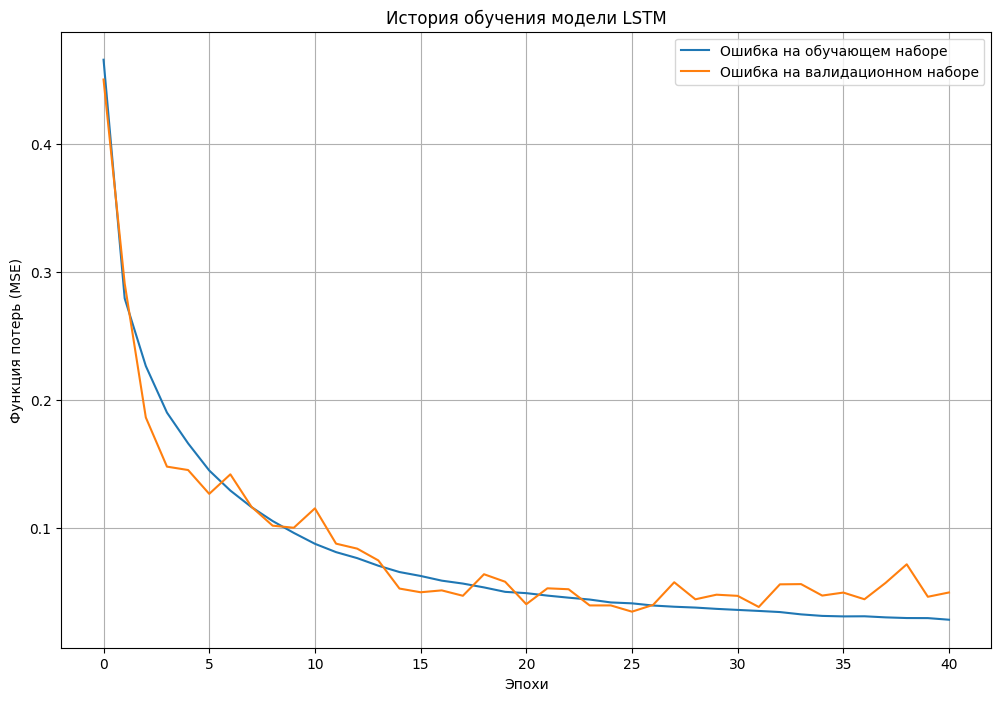

Сохранение в Google Drive: /content/drive/MyDrive/saved_models
Модель сохранена в /content/drive/MyDrive/saved_models/model_lstm_20250407_1028.h5
История обучения сохранена в /content/drive/MyDrive/saved_models/history_lstm_20250407_1028.json

Обучение модели GRU...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 128)             │          50,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,817 (354.75 KB)

 Trainable params: 90,433 (353.25 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.1885 - val_loss: 0.3343 - learning_rate: 0.0010
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3266 - val_loss: 0.1819 - learning_rate: 0.0010
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2402 - val_loss: 0.1559 - learning_rate: 0.0010
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1996 - val_loss: 0.1350 - learning_rate: 0.0010
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1724 - val_loss: 0.1346 - learning_rate: 0.0010
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1530 - val_loss: 0.1233 - learning_rate: 0.0010
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1393 - val_loss: 0.1201 - learning_rate: 0.0010
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1243 - val_loss: 0.1033 - learning_rate: 0.0010
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1163 - val_loss: 0.1099 - learning_rate: 0.0010
E

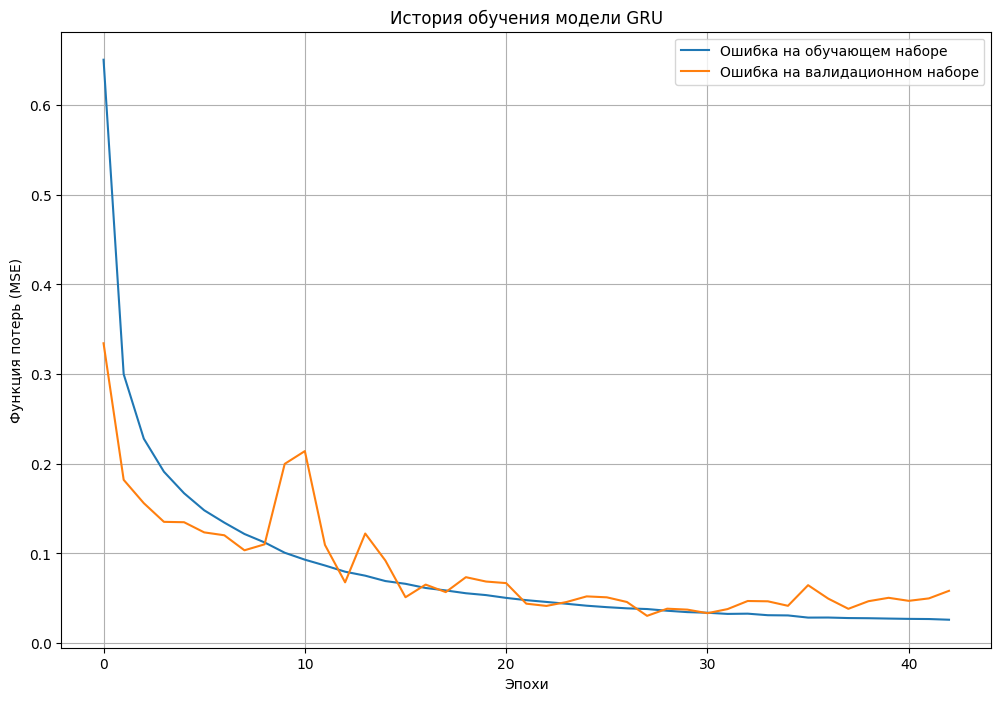

Сохранение в Google Drive: /content/drive/MyDrive/saved_models
Модель сохранена в /content/drive/MyDrive/saved_models/model_gru_20250407_1030.h5
История обучения сохранена в /content/drive/MyDrive/saved_models/history_gru_20250407_1030.json

Обучение модели BIDIRECTIONAL...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 10, 256)             │         134,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304,193 (1.16 MB)

 Trainable params: 303,425 (1.16 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.9822 - val_loss: 0.6861 - learning_rate: 0.0010
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.5494 - val_loss: 0.4238 - learning_rate: 0.0010
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4097 - val_loss: 0.3379 - learning_rate: 0.0010
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3102 - val_loss: 0.3054 - learning_rate: 0.0010
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.2442 - val_loss: 0.2490 - learning_rate: 0.0010
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.1947 - val_loss: 0.1676 - learning_rate: 0.0010
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1593 - val_loss: 0.1122 - learning_rate: 0.0010
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1338 - val_loss: 0.1044 - learning_rate: 0.0010
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.1152 - val_loss: 0.1044 - learning_rate: 0.001

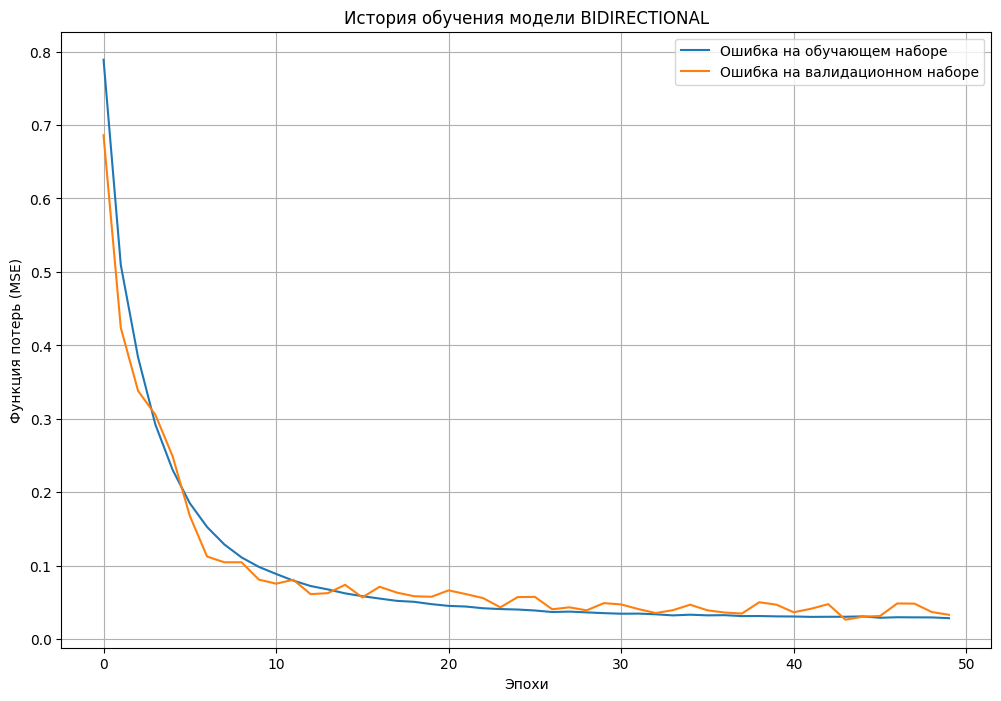

Сохранение в Google Drive: /content/drive/MyDrive/saved_models


Модель сохранена в /content/drive/MyDrive/saved_models/model_bidirectional_20250407_1036.h5
История обучения сохранена в /content/drive/MyDrive/saved_models/history_bidirectional_20250407_1036.json

Лучшая модель по валидационной ошибке: BIDIRECTIONAL
Лучшая модель сохранена в /content/drive/MyDrive/saved_models/model_bidirectional_best_20250407_1036.h5


In [16]:
# Обучение моделей с расширенным набором типов
# Для экономии времени можно уменьшить количество эпох или выбрать только некоторые типы моделей
models, histories, best_model, saved_paths = train_models(
    X_train,
    y_train,
    epochs=50,  # Для демонстрации уменьшим до 50 эпох
    batch_size=32,
    validation_split=0.2,
    save_models=True,
    model_types=['lstm', 'gru', 'bidirectional'],  # Базовые модели
    l2_reg=0.001  # Регуляризация для предотвращения переобучения
)

In [17]:
# Вывод путей сохраненных моделей
print("\nСохраненные модели и истории обучения:")
for model_type, paths in saved_paths.items():
    if model_type != 'best':
        print(f"{model_type.upper()}:")
        print(f"  Модель: {paths['model']}")
        print(f"  История: {paths['history']}")
    else:
        print(f"Лучшая модель: {paths}")


Сохраненные модели и истории обучения:
LSTM:
  Модель: /content/drive/MyDrive/saved_models/model_lstm_20250407_1028.h5
  История: /content/drive/MyDrive/saved_models/history_lstm_20250407_1028.json
GRU:
  Модель: /content/drive/MyDrive/saved_models/model_gru_20250407_1030.h5
  История: /content/drive/MyDrive/saved_models/history_gru_20250407_1030.json
BIDIRECTIONAL:
  Модель: /content/drive/MyDrive/saved_models/model_bidirectional_20250407_1036.h5
  История: /content/drive/MyDrive/saved_models/history_bidirectional_20250407_1036.json
Лучшая модель: /content/drive/MyDrive/saved_models/model_bidirectional_best_20250407_1036.h5



Оценка модели LSTM...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Среднеквадратичная ошибка (MSE): 64049920.51
Корень из среднеквадратичной ошибки (RMSE): 8003.12
Средняя абсолютная ошибка (MAE): 6335.88
Коэффициент детерминации (R²): 0.1325


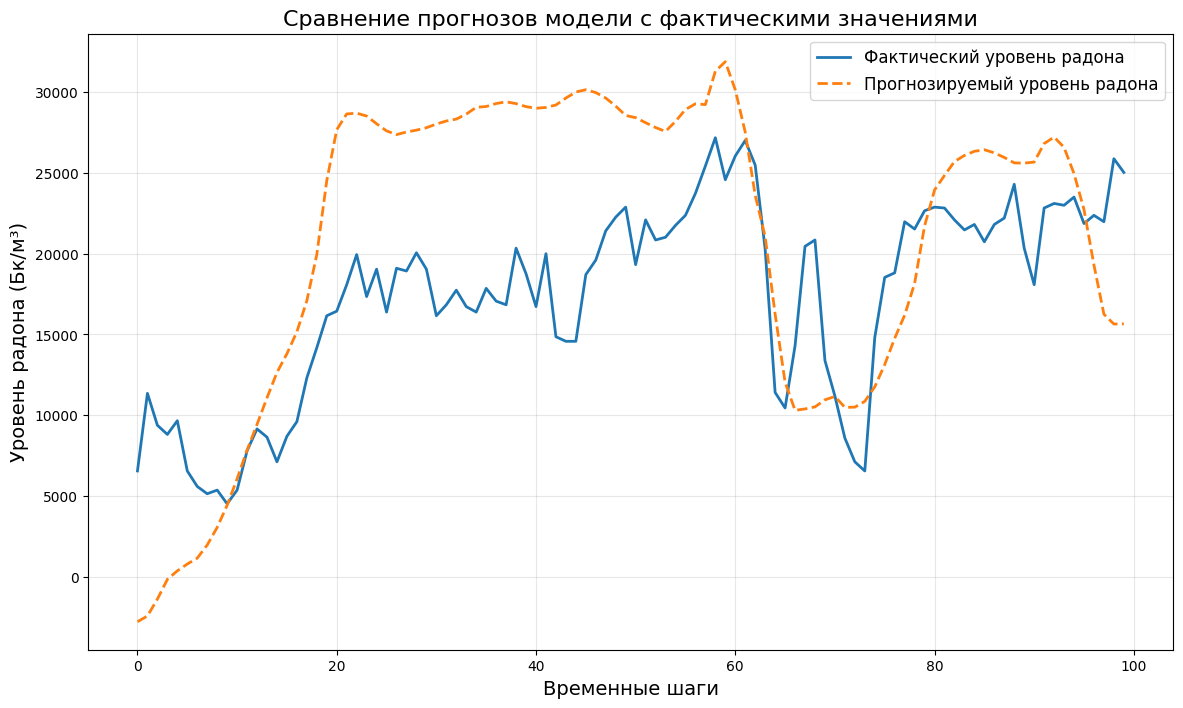


Оценка модели GRU...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Среднеквадратичная ошибка (MSE): 36422461.95
Корень из среднеквадратичной ошибки (RMSE): 6035.10
Средняя абсолютная ошибка (MAE): 4755.88
Коэффициент детерминации (R²): 0.5067


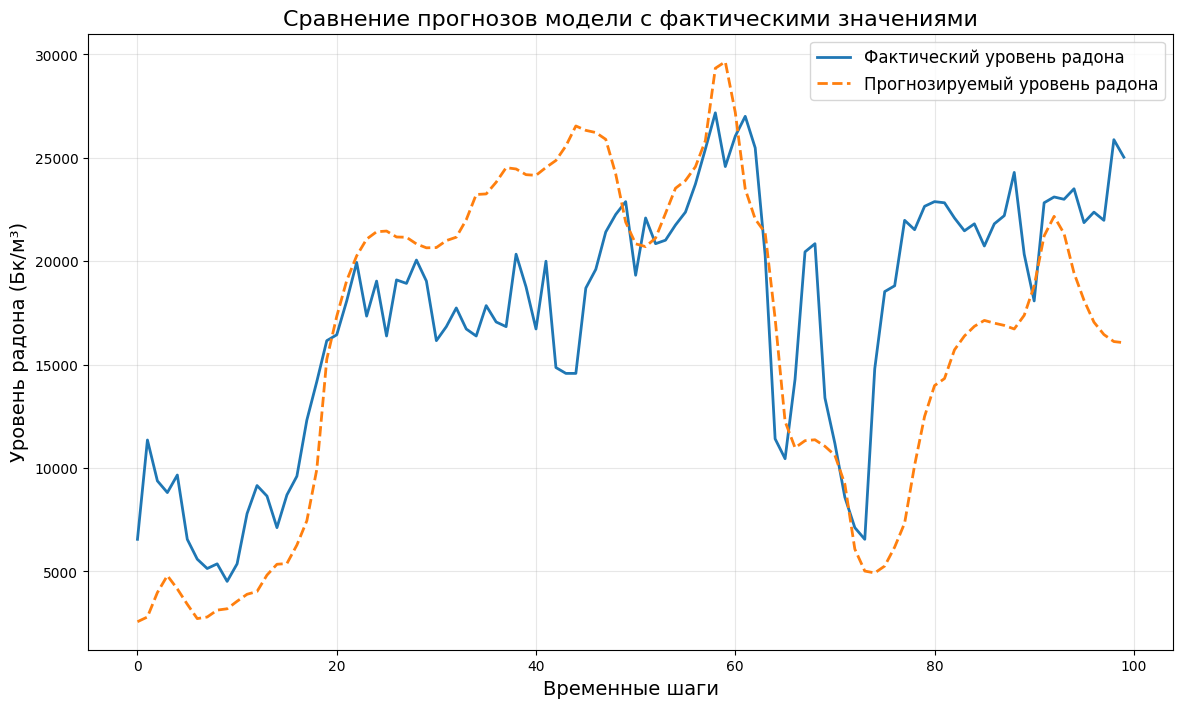


Оценка модели BIDIRECTIONAL...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Среднеквадратичная ошибка (MSE): 69532486.84
Корень из среднеквадратичной ошибки (RMSE): 8338.61
Средняя абсолютная ошибка (MAE): 6592.20
Коэффициент детерминации (R²): 0.0582


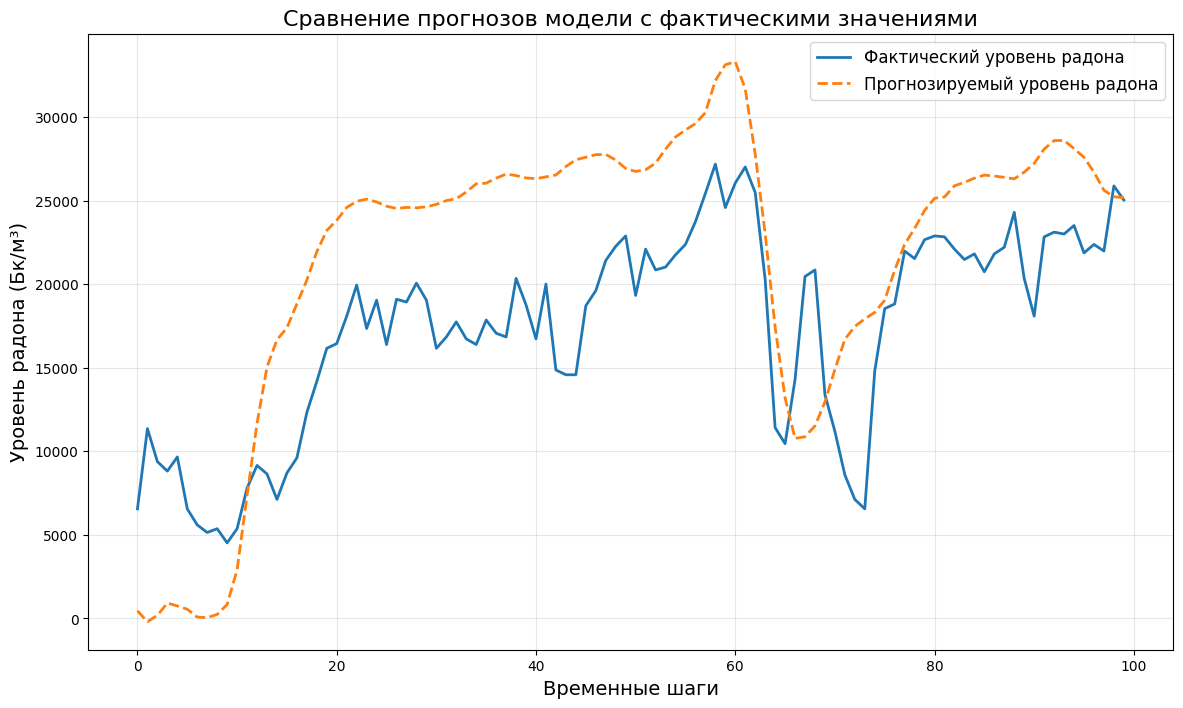

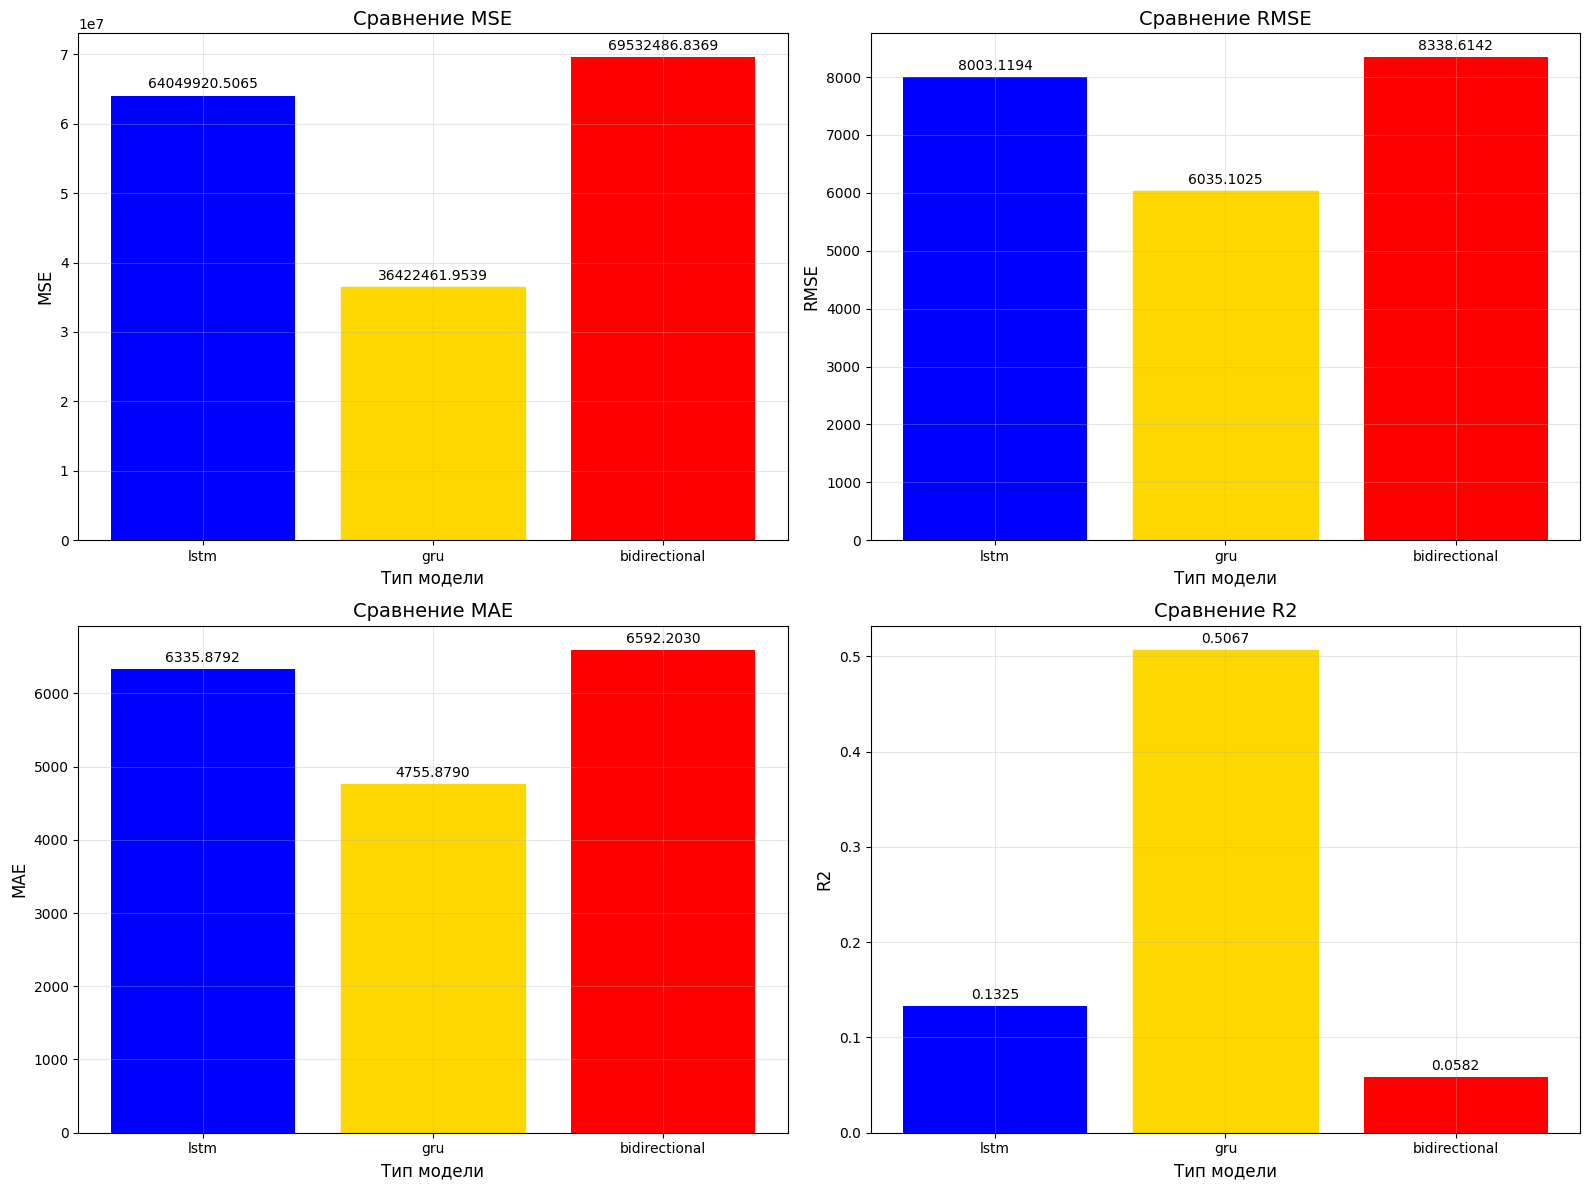


Сводная таблица метрик:
-------------------------------------------------------------------
Модель          | MSE        | RMSE       | MAE        | R²        
-------------------------------------------------------------------
lstm            | 64049920.5065 | 8003.1194  | 6335.8792  | 0.1325    
gru             | 36422461.9539 | 6035.1025  | 4755.8790  | 0.5067    
bidirectional   | 69532486.8369 | 8338.6142  | 6592.2030  | 0.0582    


In [18]:
# Оценка моделей
results = evaluate_all_models(models, X_test, y_test, scaler)


Обучение модели CNN_LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 64)              │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 10, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 5, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 5, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,809 (593.00 KB)

 Trainable params: 151,297 (591.00 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.7465 - val_loss: 0.3811 - learning_rate: 0.0010
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3817 - val_loss: 0.2689 - learning_rate: 0.0010
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3097 - val_loss: 0.2428 - learning_rate: 0.0010
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2646 - val_loss: 0.2306 - learning_rate: 0.0010
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2274 - val_loss: 0.1979 - learning_rate: 0.0010
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1973 - val_loss: 0.1888 - learning_rate: 0.0010
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1706 - val_loss: 0.1625 - learning_rate: 0.0010
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1468 - val_loss: 0.1608 - learning_rate: 0.0010
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1298 - val_loss: 0.1313 - learning_rate: 0.0010
E

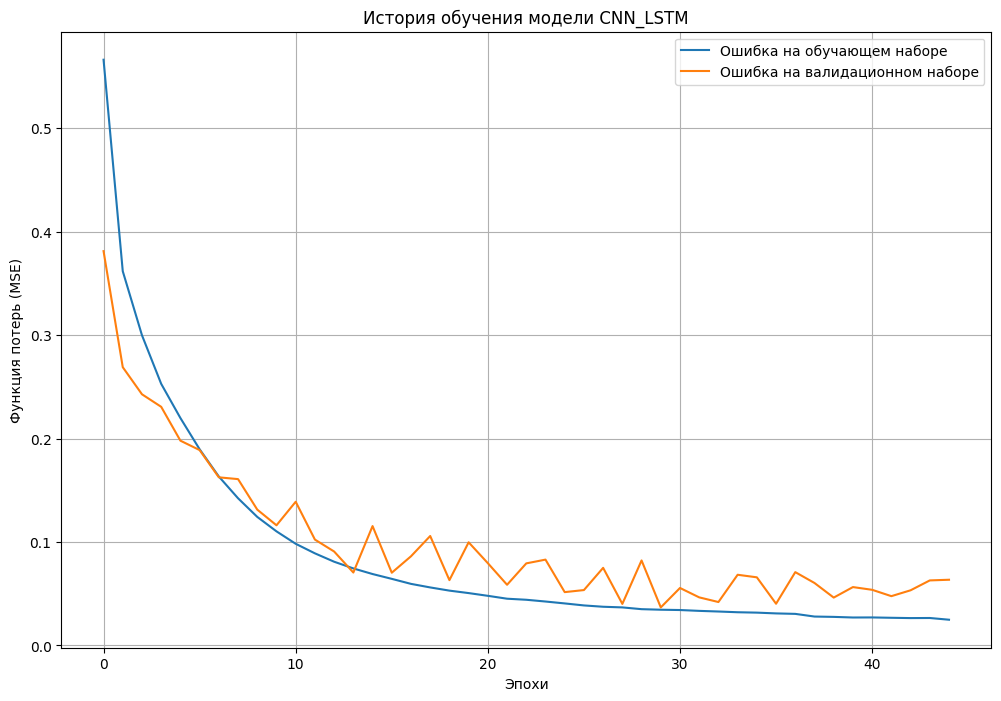

Сохранение в Google Drive: /content/drive/MyDrive/saved_models
Модель сохранена в /content/drive/MyDrive/saved_models/model_cnn_lstm_20250407_1039.h5
История обучения сохранена в /content/drive/MyDrive/saved_models/history_cnn_lstm_20250407_1039.json

Обучение модели ENSEMBLE...


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 10, 2)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 10, 128)        │         67,072 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_2 (GRU)               │ (None, 10, 128)        │         50,688 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 10, 128)        │            512 │ lstm_6[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 10, 128)        │            512 │ gru_2[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 10, 128)        │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 10, 128)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 10, 64)         │            448 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 64)             │         49,408 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_3 (GRU)               │ (None, 64)             │         37,248 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 10, 64)         │            256 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 64)             │            256 │ lstm_7[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 64)             │            256 │ gru_3[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 5, 64)          │              0 │ batch_normalization_1… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 64)             │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 64)             │              0 │ batch_normalization_1… │
├──────────────────────

 Total params: 229,409 (896.13 KB)

 Trainable params: 228,513 (892.63 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.4696 - val_loss: 0.4254 - learning_rate: 0.0010
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2164 - val_loss: 0.2860 - learning_rate: 0.0010
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.1376 - val_loss: 0.1718 - learning_rate: 0.0010
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0998 - val_loss: 0.1224 - learning_rate: 0.0010
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0765 - val_loss: 0.0910 - learning_rate: 0.0010
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0620 - val_loss: 0.0749 - learning_rate: 0.0010
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0523 - val_loss: 0.0739 - learning_rate: 0.0010
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0454 - val_loss: 0.0674 - learning_rate: 0.0010
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0405 - val_loss: 0.0664 - learning_rate: 0.0010

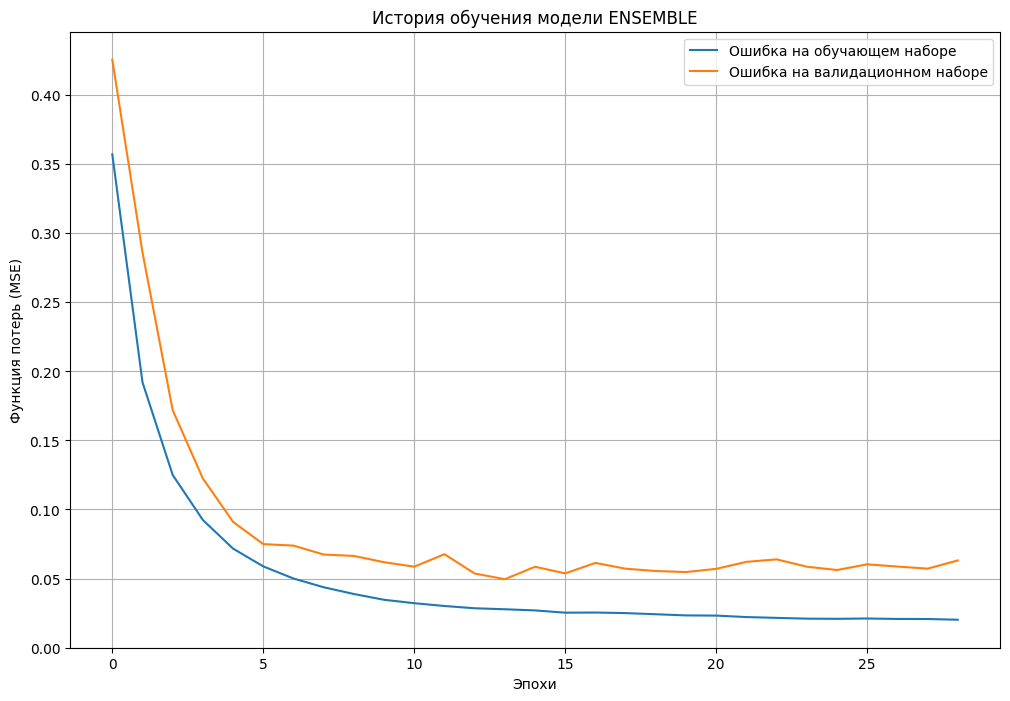

Сохранение в Google Drive: /content/drive/MyDrive/saved_models
Модель сохранена в /content/drive/MyDrive/saved_models/model_ensemble_20250407_1041.h5
История обучения сохранена в /content/drive/MyDrive/saved_models/history_ensemble_20250407_1041.json

Лучшая модель по валидационной ошибке: CNN_LSTM
Лучшая модель сохранена в /content/drive/MyDrive/saved_models/model_cnn_lstm_best_20250407_1041.h5


In [19]:
# Обучение продвинутых моделей (CNN-LSTM и ансамблевая модель)
advanced_models, advanced_histories, advanced_best_model, advanced_saved_paths = train_models(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    save_models=True,
    model_types=['cnn_lstm', 'ensemble'],
    l2_reg=0.001
)

In [20]:
# Объединение результатов
models.update(advanced_models)
histories.update(advanced_histories)
saved_paths.update(advanced_saved_paths)

In [21]:
# Выбор лучшей модели среди всех
best_model_type = min(
    [(model_type, min(histories[model_type].history['val_loss'])) for model_type in models.keys()],
    key=lambda x: x[1]
)[0]
best_model = models[best_model_type]
print(f"Лучшая модель: {best_model_type.upper()}")

Лучшая модель: BIDIRECTIONAL



Оценка модели LSTM...
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Среднеквадратичная ошибка (MSE): 64049920.51
Корень из среднеквадратичной ошибки (RMSE): 8003.12
Средняя абсолютная ошибка (MAE): 6335.88
Коэффициент детерминации (R²): 0.1325


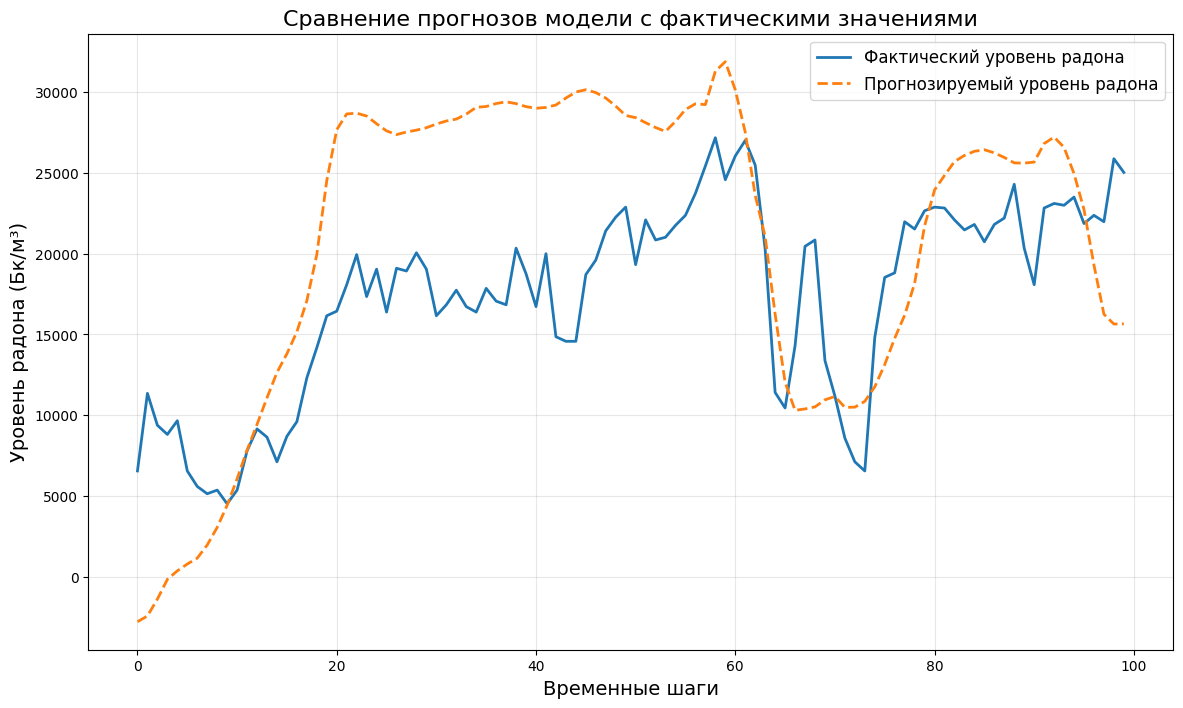


Оценка модели GRU...
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Среднеквадратичная ошибка (MSE): 36422461.95
Корень из среднеквадратичной ошибки (RMSE): 6035.10
Средняя абсолютная ошибка (MAE): 4755.88
Коэффициент детерминации (R²): 0.5067


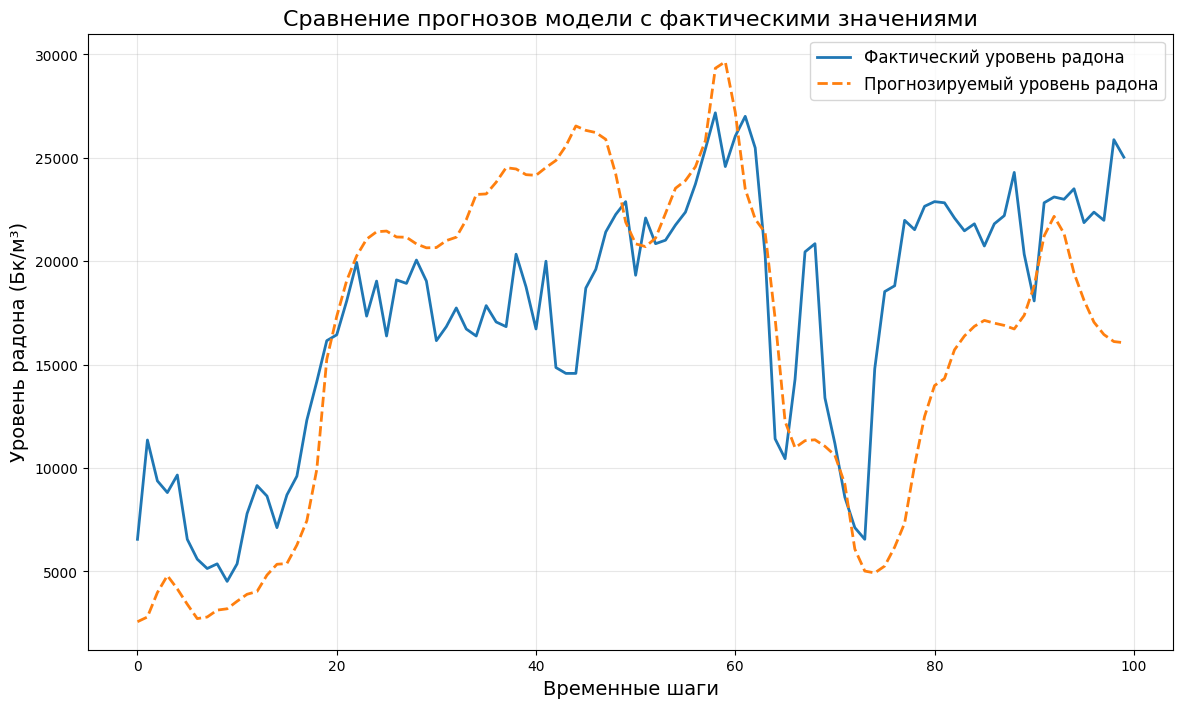


Оценка модели BIDIRECTIONAL...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Среднеквадратичная ошибка (MSE): 69532486.84
Корень из среднеквадратичной ошибки (RMSE): 8338.61
Средняя абсолютная ошибка (MAE): 6592.20
Коэффициент детерминации (R²): 0.0582


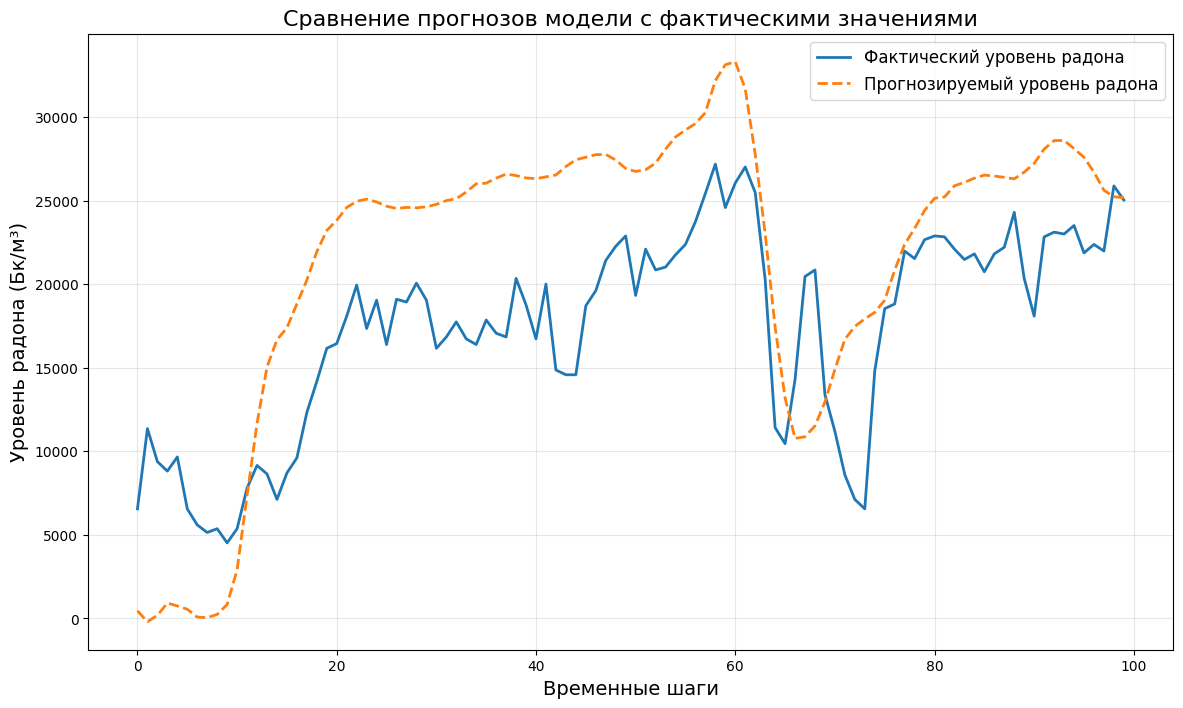


Оценка модели CNN_LSTM...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Среднеквадратичная ошибка (MSE): 29994481.54
Корень из среднеквадратичной ошибки (RMSE): 5476.72
Средняя абсолютная ошибка (MAE): 4306.60
Коэффициент детерминации (R²): 0.5938


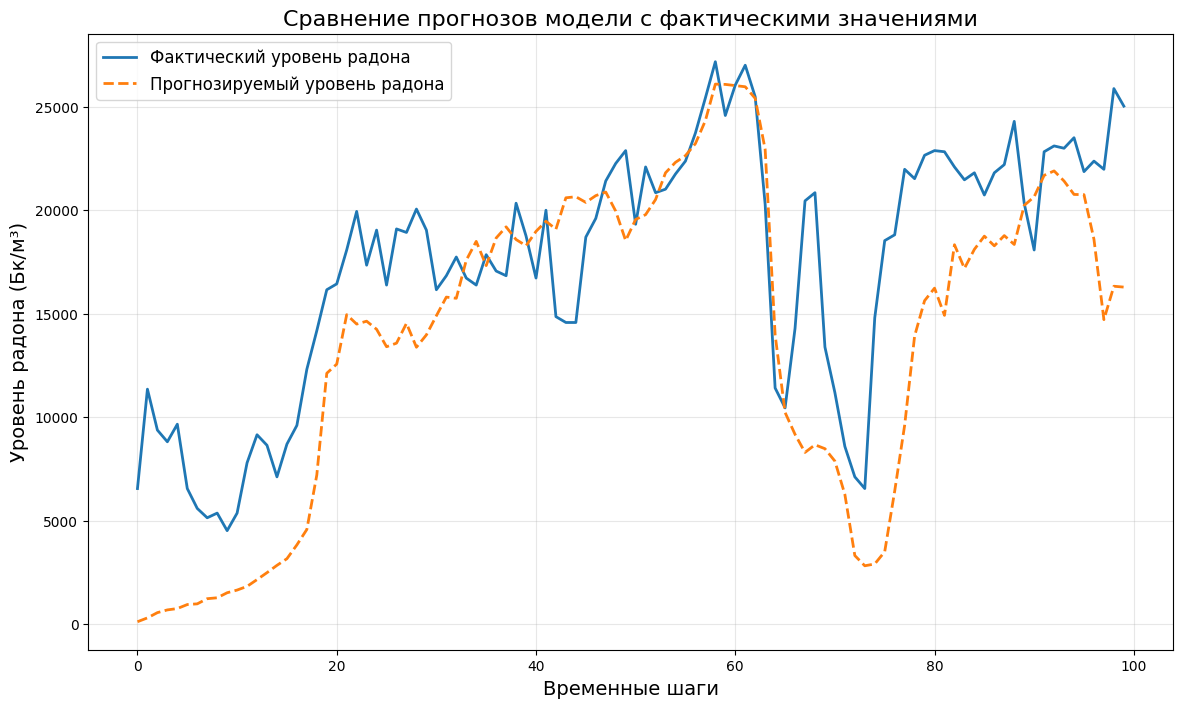


Оценка модели ENSEMBLE...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Среднеквадратичная ошибка (MSE): 45190693.30
Корень из среднеквадратичной ошибки (RMSE): 6722.40
Средняя абсолютная ошибка (MAE): 5732.86
Коэффициент детерминации (R²): 0.3879


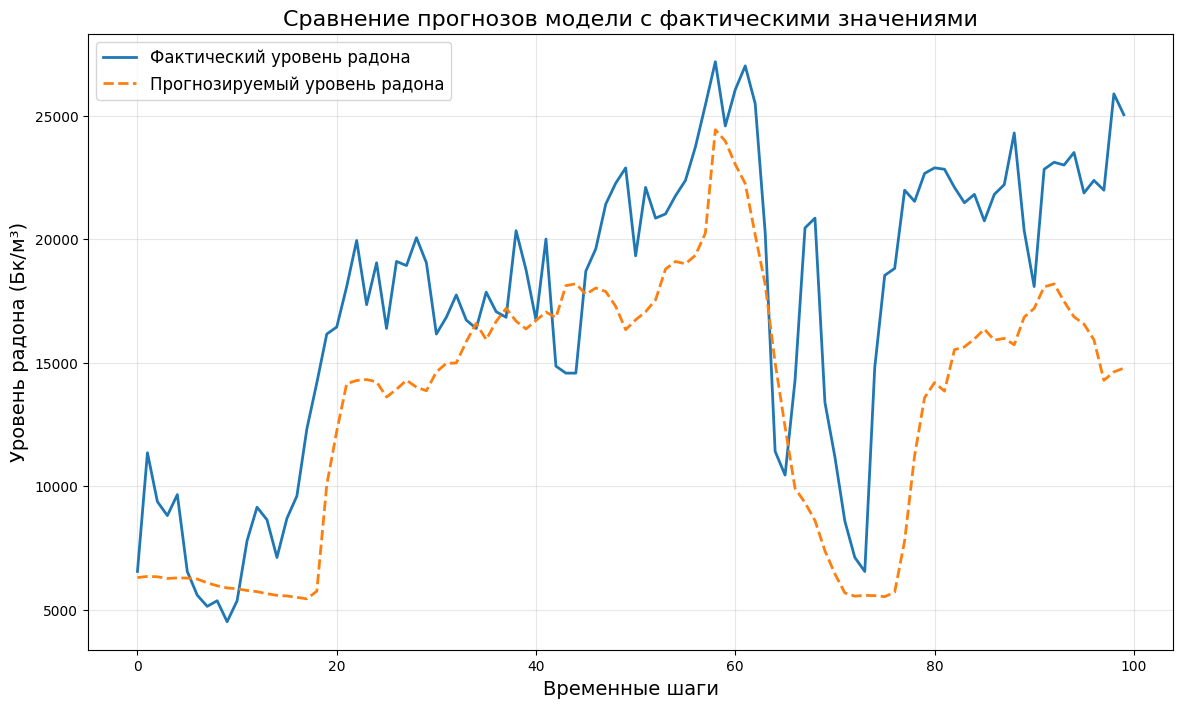

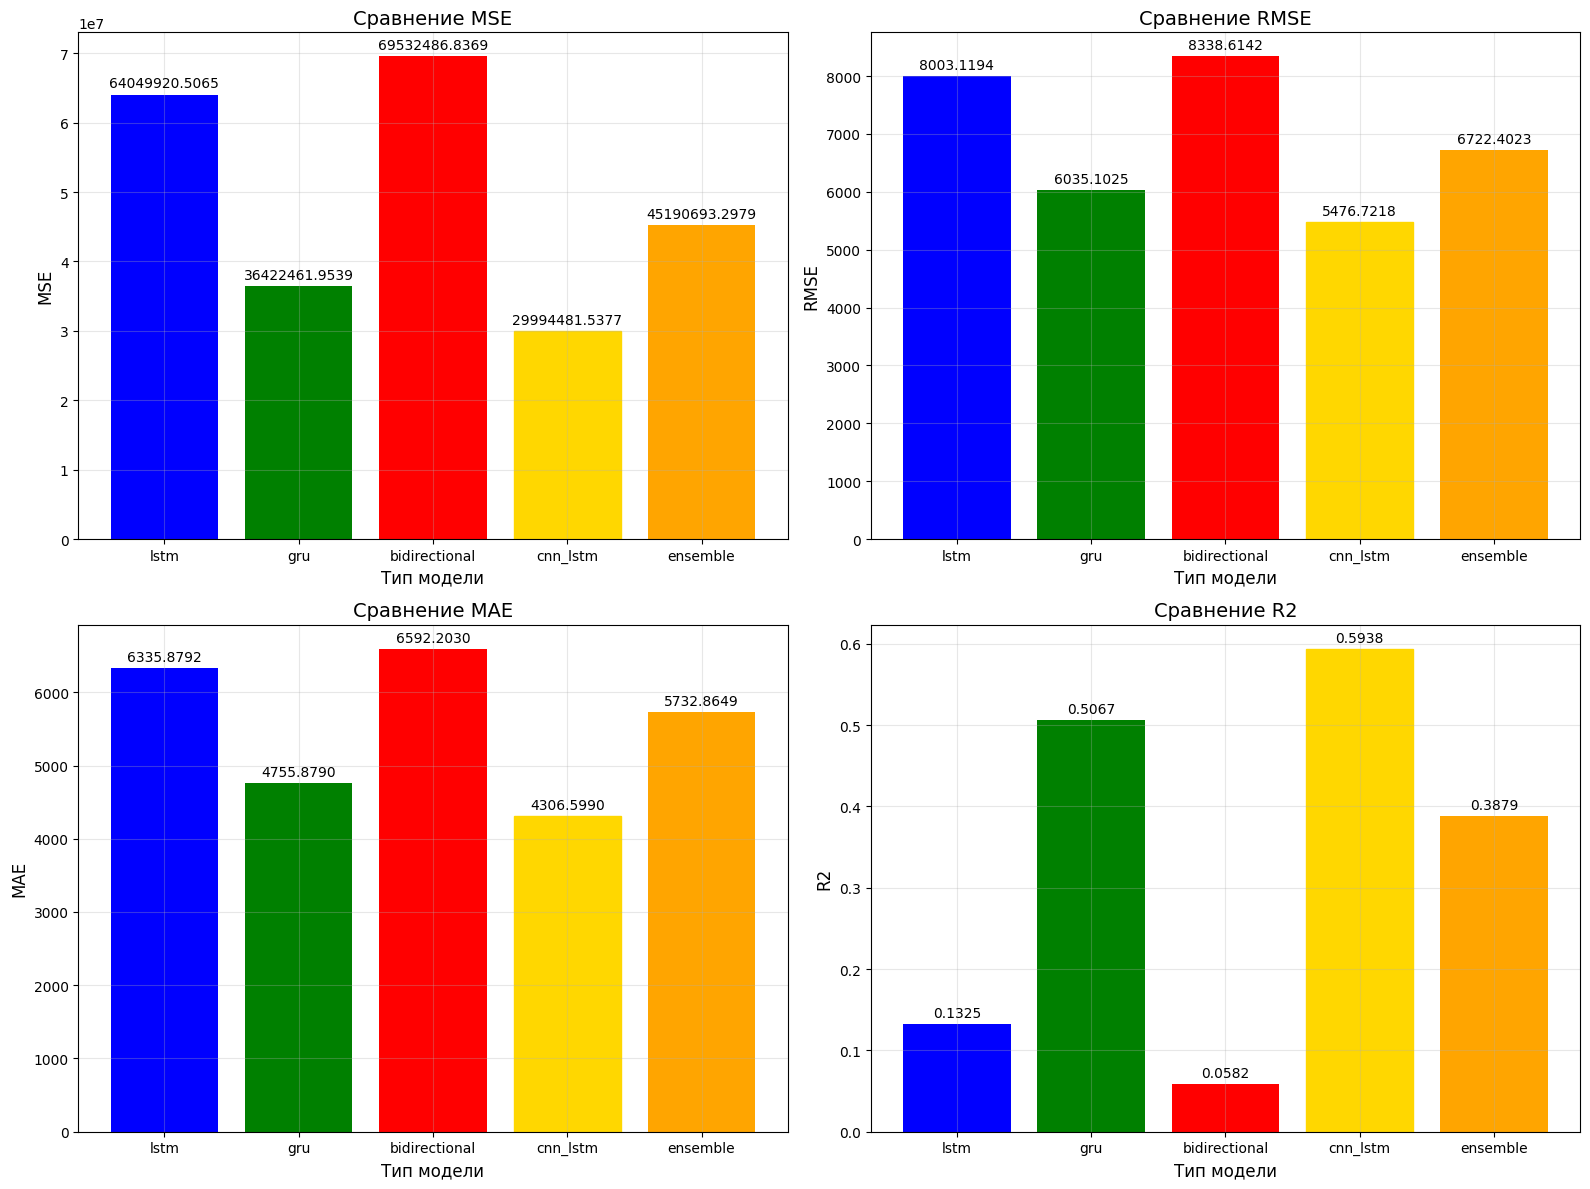


Сводная таблица метрик:
-------------------------------------------------------------------
Модель          | MSE        | RMSE       | MAE        | R²        
-------------------------------------------------------------------
lstm            | 64049920.5065 | 8003.1194  | 6335.8792  | 0.1325    
gru             | 36422461.9539 | 6035.1025  | 4755.8790  | 0.5067    
bidirectional   | 69532486.8369 | 8338.6142  | 6592.2030  | 0.0582    
cnn_lstm        | 29994481.5377 | 5476.7218  | 4306.5990  | 0.5938    
ensemble        | 45190693.2979 | 6722.4023  | 5732.8649  | 0.3879    


In [22]:
# Повторная оценка всех моделей
results = evaluate_all_models(models, X_test, y_test, scaler)

In [23]:
# Прогнозирование с использованием лучшей модели и оценка неопределенности
predictions, future_predictions, prediction_bounds = make_predictions(
    best_model,
    data,
    seq_length=10,
    future_steps=48,  # 2 дня вперед (при почасовых данных)
    use_monte_carlo=True,  # Включение метода Монте-Карло
    num_simulations=50  # Количество симуляций
)

274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [24]:
# Интерактивная визуализация результатов
fig = plot_predictions(
    data,
    predictions,
    future_predictions,
    prediction_bounds,
    plot_title="Прогнозирование уровня радона с оценкой неопределенности",
    plot_theme='plotly_white'
)
fig.show()

In [25]:
# Анализ важности признаков
fig_importance = plot_feature_importance(best_model, data, seq_length=10)
fig_importance.show()

In [26]:
# Получение пути к лучшей модели
best_model_path = saved_paths['best']

In [27]:
# Создание комплексного прогноза с визуализацией и анализом
predictions, future_predictions, prediction_bounds, fig_pred, fig_importance = predict_radon_levels(
    best_model_path,
    data,
    use_monte_carlo=True,
    plot_theme='plotly_white'
)

Ошибка загрузки модели: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}
Ошибка при прогнозировании: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [ ]:
# Отображение результатов
fig_pred.show()
fig_importance.show()

In [28]:
predictions, future_predictions, prediction_bounds, fig_pred, fig_importance, html_path = predict_radon_levels(
    best_model_path,
    data,
    use_monte_carlo=True,
    plot_theme='plotly_white',
    save_html=True,  # Включение сохранения в HTML
    html_filename='radon_prediction_report.html'  # Имя выходного файла
)

print(f"Отчет сохранен в: {html_path}")

Ошибка загрузки модели: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}
Ошибка при прогнозировании: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}